In [62]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [63]:
train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

/tmp/ipykernel_85305/1351299970.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('TrainingData.csv')
/tmp/ipykernel_85305/1351299970.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('testX.csv')


In [86]:
train.head()

,ID,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51,default_ind
0,230032.0,1696.0,1.6541,0.000,0.0,0.0,0.00000,6015.0,322.000000,40369.000000,18414.0,5563.994846,6423.000000,3067.000000,123875.0,291490.231604,1.000000,1.000000,1.000000,3.0,3.0,94.780000,8987.180000,4241.010319,72.250000,1462.000000,4532.000000,2890.000000,61.0,4532.0,1095.000000,3376.00000,625.000000,1.1667,1.0,0.000000,8.0,10.000000,4.0,1.0,73.780000,82.54700,0.08696,10.0,0.63899,0.070523,0.000000,0,10.0,770.0,4.0,3080.0,0.0
1,230033.0,1846.0,0.8095,0.000,0.0,0.0,102.00000,7532.0,3171.000000,18234.000000,13664.0,5563.994846,765.000000,1931.000000,42613.0,291490.231604,0.000000,0.000000,0.000000,0.0,0.0,74.250000,953.060000,953.060000,4.800000,1028.000000,2099.000000,2099.000000,30386.0,2281.0,2625.577602,2251.00000,169.000000,0.4167,0.0,0.000000,8.0,0.000000,2.0,0.0,99.129000,72.01657,0.00000,13.0,0.63836,0.070523,0.093187,1,732.0,437.0,5.0,2185.0,1.0
2,230034.0,1745.0,0.4001,0.000,0.0,0.0,1633.42928,2536.0,6822.332227,34030.596329,2536.0,5563.994846,6975.314709,15495.258133,76109.0,291490.231604,0.217686,0.251906,0.257669,0.0,0.0,57.302429,4347.490308,4241.010319,70.640478,1770.227688,3397.254166,3124.324441,669.0,4623.0,3772.000000,3635.39655,473.785595,25.0833,0.0,0.188793,1.0,4.344553,1.0,0.0,97.851158,29.29000,0.00000,1.0,1.00000,0.070523,0.000000,0,89.0,795.0,4.0,3180.0,1.0
3,230035.0,1739.0,0.2193,0.000,0.0,0.0,1982.00000,26440.0,4955.000000,20316.000000,37013.0,5563.994846,0.000000,0.000000,84235.0,291490.231604,0.000000,0.000000,0.000000,0.0,0.0,57.302429,0.000000,4241.010319,0.000000,1308.000000,2525.000000,791.000000,91.0,5992.0,2625.577602,3741.00000,215.000000,10.3333,0.0,0.000000,3.0,3.000000,2.0,0.0,96.272000,72.01657,0.15385,3.0,0.53241,0.000000,0.000000,1,3.0,755.0,4.0,3020.0,0.0
4,230036.0,1787.0,0.0118,0.225,0.0,0.0,5451.00000,5494.0,5494.000000,7987.000000,4696.0,5563.994846,2257.000000,27815.000000,123875.0,524848.000000,0.000000,0.000000,0.000000,0.0,0.0,20.510000,796.670000,4241.010319,28.720000,801.000000,2281.000000,2281.000000,487.0,2707.0,2625.577602,1947.00000,158.000000,0.9167,0.0,0.000000,2.0,3.000000,2.0,0.0,115.019000,72.01657,0.00000,1.0,0.92665,0.070523,0.

In [64]:
columns = ['ID',
           'Credit Worthiness Score',
           'Number and Riskiness of Credit Enquiry',
           'Default Severity (Any Loan)',
           'Default Severity (Auto Loan)',
           'Default Severity (Education Loan)',
           'Min Cred Available (Revolving Credit Cards)',
           'Max Cred Available (Active Credit Lines)',
           'Max Cred Available (Active Revolving Credit Cards)',
           'Total Available Credit (Cards with 1 missed payment)',
           'Total Credit Available',
           'Dues Collected Post Default',
           'Total Amount Due (Active Cards)',
           'Credit Amount Paid (Prev Year)',
           'Annual Income',
           'Property Value',
           'Full Credit Utilisation (Revolving Credit Cards)',
           'Full Credit Utilisation (Credit Cards)',
           'Full Credit Utilisation (Credit Lines)',
           '>75 percent Credit Utilisation (Credit Cards)',
           '>75 percent Credit Utilisation (Credit Lines)',
           'Average Utilisation (Revolving Credit Cards)',
           'Average Utilisation Last 2 Years (All Credit Lines)',
           'Average Utilisation Last Year (All Credit Cards)',
           'Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards)',
           'Average Tenure (Active Revolving Credit Cards)',
           'Tenure of Oldest Active Credit Card',
           'Tenure of Oldest Active Revolving Credit Card',
           'Days Since Last Missed Payment',
           'Tenure of Oldest Credit Line',
           'Max Tenure (Auto Loans)',
           'Max Tenure (Education Loans)',
           'Sum of Tenures (Active Credit Cards)',
           'Stay Duration of Current Residence',
           'Credit Lines with 1 Missed Payment (Last 6 Months)',
           'Revolving Credit Cards with 1 Missed Payment (Last 2 Years)',
           'Active Credit Lines',
           'Credit Cards with >2Y Tenure',
           'Credit Lines activated Prev 2 Years',
           'Credit Lines with Current Delinquency',
           'Utilization on Active Education Loans',
           'Utilization on Active Auto Loans',
           'Financial Stress Index',
           'Credit Lines with No Missed Payments (Prev 2 Years)',
           'Ratio(Max Amount Due : Sum of Amounts Due)',
           'Mortgage Loans (With 2 Missed Payements)',
           'Auto Loans (With 2 Missed Payments)',
           'Type of Product',
           'Int Value for an Application',
           'Bucketized Credit Worthiness Score',
           'Compound of mvar49 and mvar48',
           'mvar51',
           'default_ind']

In [65]:
train.columns = columns
test.columns = columns[:-1]

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ID                                                                      83000 non-null  int64  
 1   Credit Worthiness Score                                                 83000 non-null  object 
 2   Number and Riskiness of Credit Enquiry                                  77114 non-null  float64
 3   Default Severity (Any Loan)                                             82465 non-null  float64
 4   Default Severity (Auto Loan)                                            82465 non-null  float64
 5   Default Severity (Education Loan)                                       82465 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                             83000 

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47000 entries, 0 to 46999
Data columns (total 52 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ID                                                                      47000 non-null  int64  
 1   Credit Worthiness Score                                                 47000 non-null  object 
 2   Number and Riskiness of Credit Enquiry                                  43673 non-null  float64
 3   Default Severity (Any Loan)                                             46706 non-null  float64
 4   Default Severity (Auto Loan)                                            46706 non-null  float64
 5   Default Severity (Education Loan)                                       46706 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                             47000 

In [68]:
train.replace('missing', np.nan, inplace = True)
train.replace('na', np.nan, inplace = True)
train.replace('#VALUE!', np.nan, inplace = True)

test.replace('missing', np.nan, inplace = True)
test.replace('na', np.nan, inplace = True)
test.replace('#VALUE!', np.nan, inplace = True)

def convert_to_int(entry):
    return float(entry)

for col in train.columns:
    if col != 'Type of Product':
        train[col] = train[col].apply(convert_to_int)
    if col not in ['Type of Product', 'default_ind']:
        test[col] = test[col].apply(convert_to_int)

### Check For Adverserial Validation

In [97]:
train_stats = train.drop(['ID', 'default_ind'], axis = 1).describe()
test_stats = test.drop(['ID'], axis = 1).describe()

diff = (train_stats - test_stats)/train_stats
diff

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735,0.433735
mean,0.000567,-0.058354,0.008570,0.005924,-0.035125,-0.025014,-0.036354,-0.014453,-0.026747,-0.033594,0.044252,-0.045565,-0.079081,0.026351,-0.018167,-0.127402,-0.104019,-0.104823,-0.021150,-0.020492,-0.012186,-0.020910,-0.016005,0.020430,-0.006069,-0.011625,-0.010430,0.006819,-0.011605,0.006121,-0.006293,-0.013660,-0.020667,-0.009919,-0.059748,0.004673,0.008657,-0.001796,-0.074011,-0.007393,-0.002732,-0.013643,0.010745,0.000345,-0.032741,0.013322,0.058293,-0.003344,0.001647,0.000292,0.001507
std,-0.004992,-0.097360,0.004854,-0.061149,-0.059163,-0.030070,-0.073034,-0.031217,-0.085272,-0.035010,0.233278,-0.051445,-0.393003,-0.066879,-0.030797,-0.061481,-0.049535,-0.054154,-0.009259,-0.010163,0.003328,-0.006764,-0.000174,0.178065,-0.007966,-0.018578,-0.020256,0.002204,-0.019009,-0.005144,0.001413,-0.029433,-0.019013,0.007218,-0.053446,0.005680,0.005870,-0.013326,0.014470,-0.046895,-0.008894,-0.014576,0.003006,0.002518,-0.020499,-0.037682,0.012898,0.000095,-0.003695,0.002589,-0.000574
min,-0.011510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.739726,NaN,NaN,NaN,NaN,NaN,-0.452991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,-1.142857,NaN,NaN,NaN,-0.231124,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000594,-0.025794,NaN,NaN,NaN,0.102041,-0.014024,0.023310,0.010511,0.069492,0.007019,-0.071076,-0.137079,0.000000,-0.005542,NaN,NaN,NaN,NaN,NaN,-0.013623,-0.038397,-0.020412,-0.087647,0.000000,0.000000,0.000000,0.000000,-0.018433,0.006121,-0.006293,0.017094,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,-0.007393,-0.002732,NaN,0.000000,-0.002155,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.001961
50%,0.000567,-

In [88]:
train_stats

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,8.300000e+04,83000.000000,83000.000000,8.300000e+04,8.300000e+04,83000.000000,8.300000e+04,8.300000e+04,8.300000e+04,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.00000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000
mean,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,3.022857e+04,5.563995e+03,6975.314709,1.549526e+04,1.894841e+05,2.914902e+05,0.217686,0.251906,0.257669,0.915188,0.998508,57.302429,4347.490308,4241.010319,70.640478,1770.227688,3397.254166,3124.324441,8810.980464,5524.663639,2625.577602,3635.39655,473.785595,6.983915,0.226593,0.188793,6.381245,4.344553,4.223780,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,0.372976,556.021277,600.127494,4.285201,2570.704518
std,92.673032,1.500469,11.055764,1.698790,5.725357,3202.515666,4.455754e+04,8785.046619,46971.886771,6.596435e+04,1.122370e+04,10446.537195,4.916050e+04,7.427382e+06,2.316514e+05,0.525265,0.614645,0.625256,1.680651,1.725415,30.163947,3009.838776,2699.409664,291.730783,1250.829009,2722.446195,2453.422604,13511.245611,3215.745811,1144.538695,1106.25027,492.407140,7.539215,0.673083,0.416983,5.168560,4.477619,3.884162,0.406940,13.725075,13.647146,0.369388,6.239421,0.233531,0.194088,0.278362,0.483599,1106.953295,144.441805,0.441242,664.087204
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.387000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.014000,0

In [95]:
test_stats

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,4.700000e+04,47000.000000,4.700000e+04,4.700000e+04,47000.000000,47000.000000,4.700000e+04,4.700000e+04,4.700000e+04,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.000000,47000.00000,47000.000000
mean,1746.520705,1.116369,5.355489,0.458419,1.122088,1674.288435,1.814447e+04,6920.934814,3.494081e+04,3.124406e+04,5317.779221,7293.145999,1.672063e+04,1.844909e+05,2.967859e+05,0.245419,0.278109,0.284679,0.934543,1.018970,58.000738,4438.397030,4308.885982,69.197307,1780.971841,3436.747861,3156.912187,8750.896928,5588.776298,2609.506523,3658.275601,480.257276,7.128250,0.228841,0.200073,6.351425,4.306943,4.231367,0.094162,98.574587,72.213300,0.336073,6.483185,0.706351,0.072832,0.091945,0.351234,557.880872,599.139021,4.28395,2566.831323
std,93.135694,1.646555,11.002100,1.802669,6.064084,3298.814639,4.781174e+04,9059.286798,5.097726e+04,6.827375e+04,8605.461978,10983.963862,6.848072e+04,7.924119e+06,2.387857e+05,0.557559,0.645092,0.659116,1.696213,1.742951,30.063570,3030.195993,2699.879627,239.783650,1260.792927,2773.023125,2503.118646,13481.468896,3276.873694,1150.426494,1104.686907,506.899917,7.682557,0.668224,0.439269,5.139204,4.451335,3.935921,0.401052,14.368713,13.768527,0.374772,6.220666,0.232943,0.198066,0.288851,0.477361,1106.847627,144.975517,0.44010,664.468101
min,1494.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.413000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.030000,0.

In [96]:
mean = diff.loc['mean']
std = diff.loc['std']

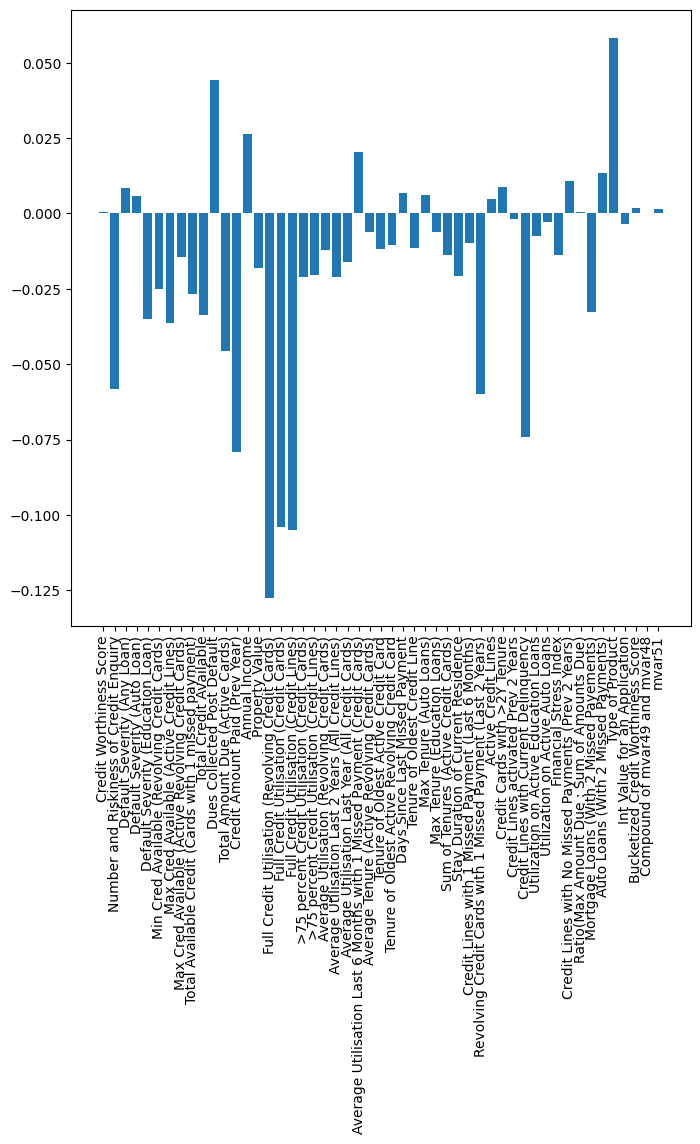

In [100]:
plt.figure(figsize = (8, 8))
plt.bar(mean.index, mean.values)
plt.xticks(rotation=90)
plt.show()

In [70]:
le = LabelEncoder()
train['Type of Product'] = le.fit_transform(train['Type of Product'])
test['Type of Product'] = le.transform(test['Type of Product'])

In [71]:
train = train.apply(lambda x: x.fillna(x.mean()),axis=0)
test = test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [79]:
pca = PCA(n_components=3)
train_pca = pca.fit_transform(train.drop(['ID', 'default_ind'], axis = 1))
test_pca = pca.transform(test.drop(['ID'], axis = 1))

train_pca = pd.DataFrame(train_pca, columns = ['Principal Feature 1', 'Principal Feature 2', 'Principal Feature 3'])
test_pca = pd.DataFrame(test_pca, columns = ['Principal Feature 1', 'Principal Feature 2', 'Principal Feature 3'])

train_pca.head()

,Principal Feature 1,Principal Feature 2,Principal Feature 3
0,-65609.641419,-1336.156271,-16812.908387
1,-146872.367498,-2072.710151,-26017.231328
2,-113375.797481,-2185.512712,-28219.169174
3,-105249.549783,-234.481378,-625.744308
4,-65579.954577,230106.170825,-48714.788096


In [80]:
test_pca.head()

,Principal Feature 1,Principal Feature 2,Principal Feature 3
0,-139962.657606,-211070.090531,-27254.711285
1,8737.884429,166945.915328,-14765.729673
2,-66601.098046,1837.838360,-41462.609726
3,-70553.877638,81764.731996,-33332.844130
4,-146871.202924,2880.923621,-31002.758571


In [81]:
train_pca.describe()

,Principal Feature 1,Principal Feature 2,Principal Feature 3
count,8.300000e+04,8.300000e+04,8.300000e+04
mean,1.041286e-11,-2.468566e-13,-6.665128e-12
std,7.427382e+06,2.323117e+05,8.267448e+04
min,-1.895222e+05,-3.341461e+05,-1.002990e+06
25%,-1.468717e+05,-1.082987e+05,-3.506112e+04
50%,-1.171425e+05,-3.068034e+03,-2.175393e+04
75%,-7.055171e+04,3.732251e+03,7.927000e+03
max,9.908105e+08,1.219073e+07,6.853761e+06


In [82]:
test_pca.describe()

,Principal Feature 1,Principal Feature 2,Principal Feature 3
count,4.700000e+04,4.700000e+04,4.700000e+04
mean,-4.992421e+03,5.424215e+03,1.326728e+03
std,7.924119e+06,2.396338e+05,8.788173e+04
min,-1.895216e+05,-2.906443e+05,-1.315187e+06
25%,-1.468709e+05,-1.071817e+05,-3.492296e+04
50%,-1.171416e+05,2.212454e+03,-2.128445e+04
75%,-6.562967e+04,9.252109e+03,8.186301e+03
max,9.908105e+08,1.615882e+07,6.893162e+06


In [84]:
(train_pca.describe() - test_pca.describe())#/train_pca.describe()

,Principal Feature 1,Principal Feature 2,Principal Feature 3
count,36000.000000,3.600000e+04,36000.000000
mean,4992.420834,-5.424215e+03,-1326.728473
std,-496736.945042,-7.322126e+03,-5207.247009
min,-0.598431,-4.350184e+04,312197.095672
25%,-0.750927,-1.116967e+03,-138.167306
50%,-0.898360,-5.280487e+03,-469.485076
75%,-4922.033015,-5.519858e+03,-259.300591
max,9.639720,-3.968092e+06,-39401.473752


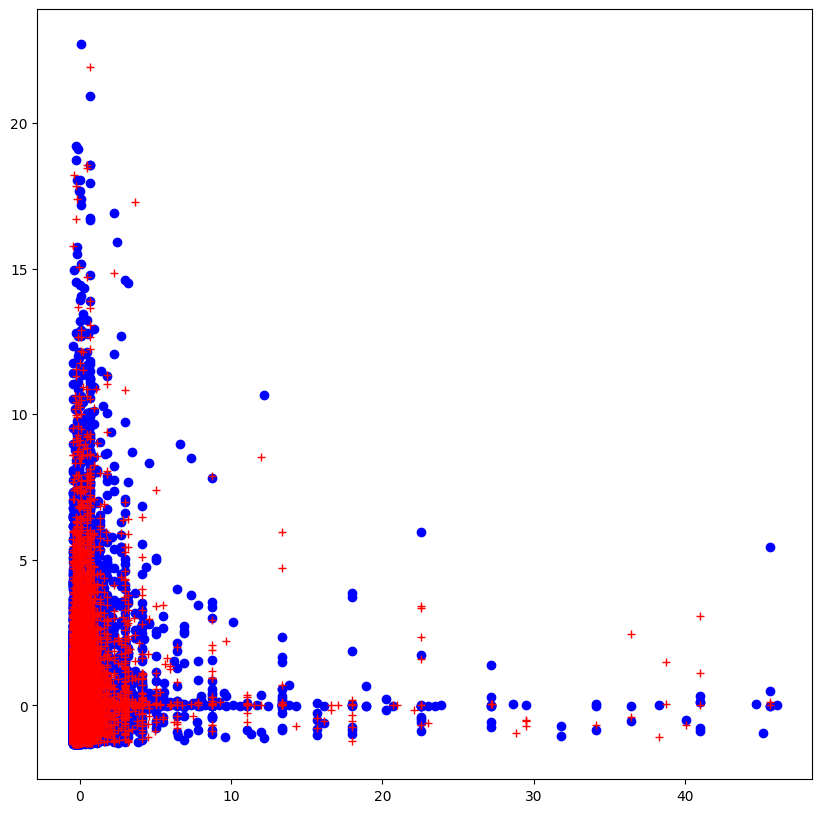

In [49]:
train_pca = train_pca[(train_pca['Principal Feature 1']< 0.1*1e8) & (train_pca['Principal Feature 2']< 0.5*1e7)]
test_pca = test_pca[(test_pca['Principal Feature 1']< 0.1*1e8) & (test_pca['Principal Feature 2']< 0.5*1e7)]

sc = StandardScaler()
train_pca = sc.fit_transform(train_pca)
test_pca = sc.transform(test_pca)

train_pca = pd.DataFrame(train_pca, columns = ['Principal Feature 1', 'Principal Feature 2'])
test_pca = pd.DataFrame(test_pca, columns = ['Principal Feature 1', 'Principal Feature 2'])

plt.figure(figsize=(10,10))
plt.plot(train_pca['Principal Feature 1'], train_pca['Principal Feature 2'], 'bo')
plt.plot(test_pca['Principal Feature 1'], test_pca['Principal Feature 2'], 'r+')
plt.show()

### Feature Understanding (Explanations and Stuff to Look into)

- Auto Loans: Loans where Vehicles are kept as collateral
- Revolving Credit: You have a fixed amount that you can borrow in some fixed time frame. After that the amount you can borrow replenishes to the full amount. Although you will have a maximum limit. For example, you can borrow 100 rupees a month max and the overall limit on that credit line is 500 rupees. So if your overall borrowed amount is 460 rupees and for that month you havenn't borrowed anything so far, you will be able to borrow only 40 rupees even though the monthly limit is 100
- Difference between Credit Worthiness Score and its bucketized version?
- Difference in statistics between train and test (Need for Adverserial Validation?)

### Feature Ideas and Experiments
- Binary Variable for checking if the person has moved into current residence after issuing any credit lines
- Credit Amount Paid / Number of Credit Lines with No Missed Payments
- Max Cred Available vs Default Severity
- Separate modeling for 0 Default Severity vs Non-Zero Default Severity
- KNN Missing Values Fill In
- Property Value vs Annual Income (Some Indicator of whether or not a person spends too much for their Income)
- 75% utilisation / Full Utilisation

In [8]:
df.head(10)

,ID,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0.0
5,230037,1579,NaN,3.502,0.0,0.0,missing,missing,missing,missing,0,199,missing,missing,77298,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,183,973,missing,missing,missing,1.3333,0,na,2,na,2,na,missing,missing,1.5,0,NaN,na,na,C,35,455,4,1820,1.0
6,230038,1818,0.4001,0.000,0.0,0.0,missing,1088,missing,1536,1498,missing,448,2331,123875,missing,na,0,0,0,0,NaN,NaN,NaN,29.16,1034,760,missing,30386,3437,missing,791,34,9.3333,0,na,2,0,0,0,88.171,missing,0,2,0.87224,na,0,C,2,392,5,1960,1.0
7,230039,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,198200,1263525,na,na,na,0,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,0.0833,na,na,na,na,na,na,missing,missing,missing,na,NaN,na,na,C,2,615,#VALUE!,#VALUE!,0.0
8,230040,1836,0.1358,0.000,0.0,0.0,347,38964,17828,70729,65843,missing,16298,18877,109010,missing,0,0,0,1,1,32.02,0.00,0.00,